In [10]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from time import perf_counter
import seaborn as sns
import glob
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn import metrics

import seaborn as sns
def printmd(string):
   
    display(Markdown(string))

In [11]:
image_dir = Path('/content/drive/MyDrive/cauliflower_paper/cauliflower')
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [12]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')


image_df = pd.concat([filepaths, labels], axis=1)


image_df = image_df.sample(frac=1).reset_index(drop = True)


image_df.head(3)

Filepath               Label
0  /content/drive/MyDrive/cauliflower_paper/cauli...        Downy Mildew
1  /content/drive/MyDrive/cauliflower_paper/cauli...  Bacterial spot rot
2  /content/drive/MyDrive/cauliflower_paper/cauli...        Downy Mildew

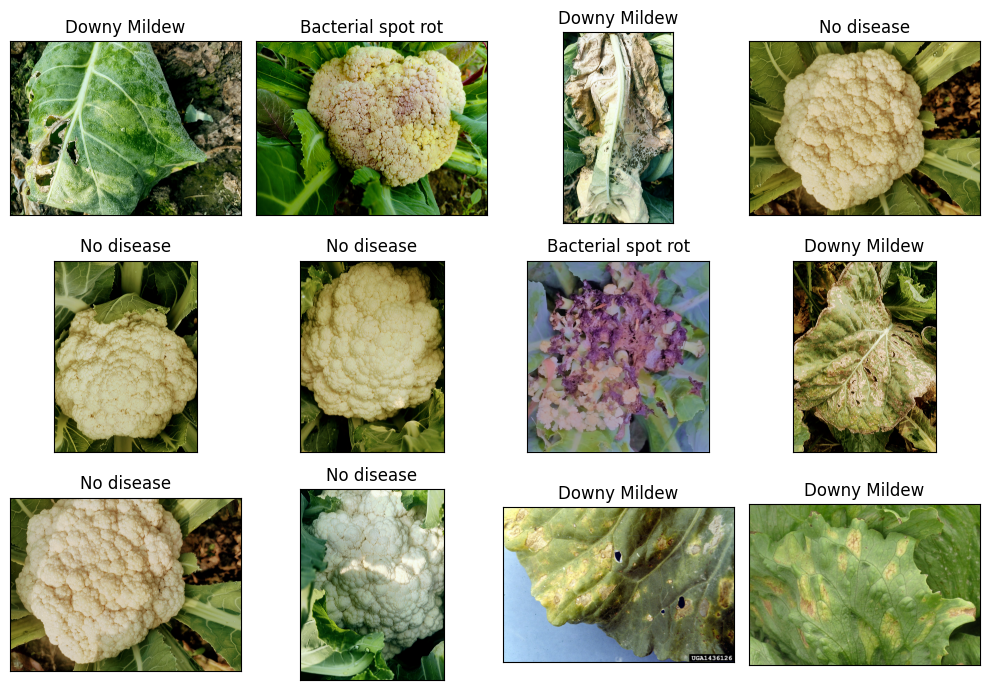

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

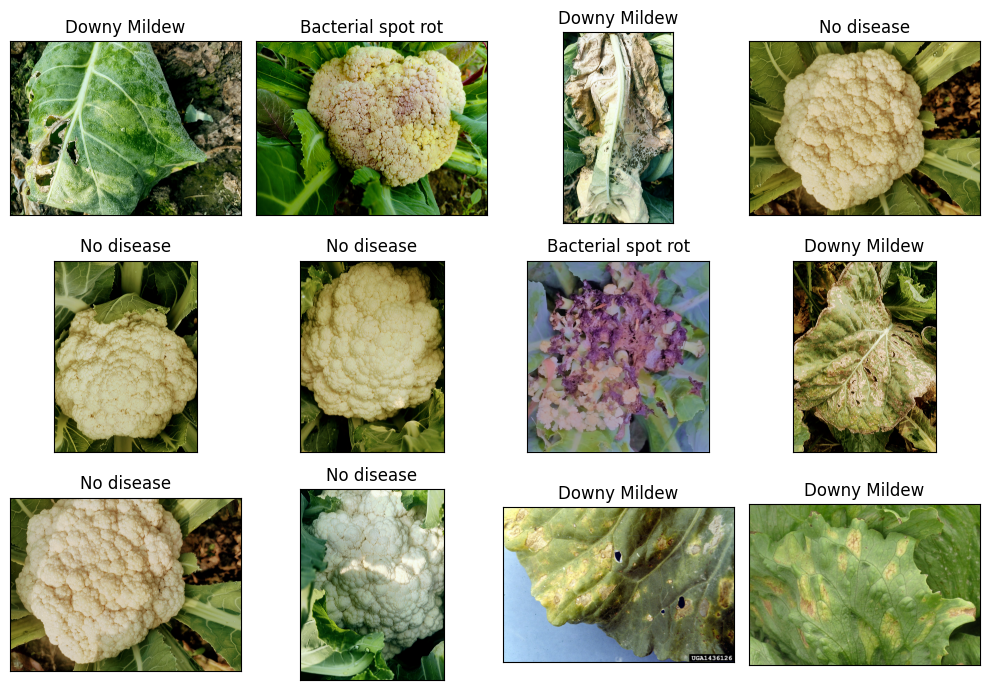

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

In [15]:
vc = image_df['Label'].value_counts()
print(vc)

No disease            188
Bacterial spot rot    173
Downy Mildew          146
Black Rot              40
Name: Label, dtype: int64


<ipython-input-16-e3a44f33d441>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


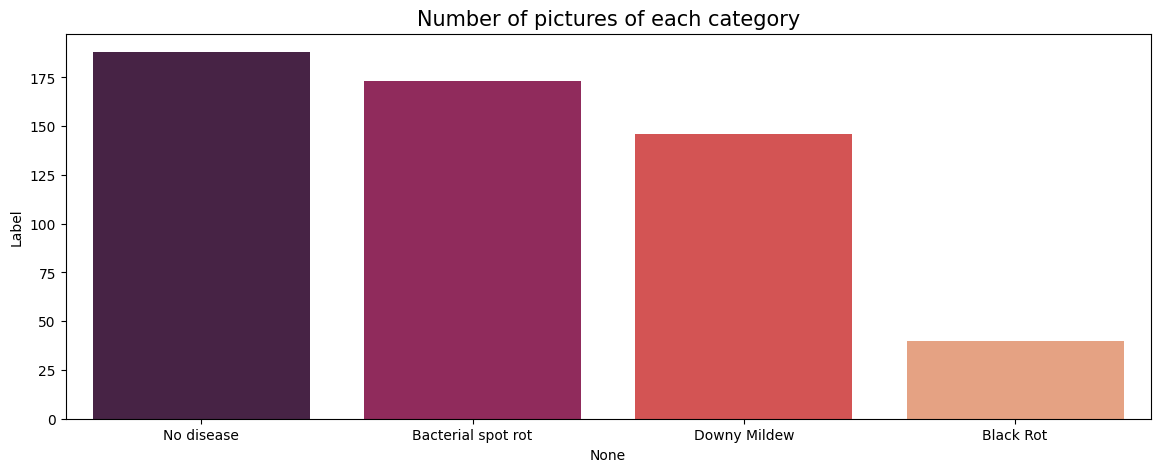

In [16]:
vc = image_df['Label'].value_counts()
plt.figure(figsize=(14,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [17]:
def create_gen():
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    return train_generator,test_generator,train_images,val_images,test_images

In [18]:
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [19]:
train_generator,test_generator,train_images,val_images,test_images=create_gen()

Found 437 validated image filenames belonging to 4 classes.
Found 437 validated image filenames belonging to 4 classes.
Found 110 validated image filenames belonging to 4 classes.


In [20]:
input_shape = (32, 224, 224, 3)
n_classes = 4

model_01 = models.Sequential([
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    layers.Dense(n_classes, activation='softmax'),
])

model_01.build(input_shape=input_shape)
model_01.summary()

model_01.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (32, 220, 220, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (32, 110, 110, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (32, 108, 108, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (32, 106, 106, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 53, 53, 64)          0         
 g2D)                                                   

In [21]:
history_01 = model_01.fit(train_images,validation_data=val_images,epochs=30,verbose=1)

Epoch 1/30
14/14 [==============================] - 204s 14s/step - loss: 1.1231 - accuracy: 0.5172 - val_loss: 2.3335 - val_accuracy: 0.2632
Epoch 2/30
14/14 [==============================] - 71s 5s/step - loss: 0.7127 - accuracy: 0.7368 - val_loss: 1.2525 - val_accuracy: 0.3753
Epoch 3/30
14/14 [==============================] - 69s 5s/step - loss: 0.4764 - accuracy: 0.8124 - val_loss: 0.6420 - val_accuracy: 0.8101
Epoch 4/30
14/14 [==============================] - 63s 5s/step - loss: 0.3684 - accuracy: 0.8719 - val_loss: 0.6717 - val_accuracy: 0.7437
Epoch 5/30
14/14 [==============================] - 67s 5s/step - loss: 0.2335 - accuracy: 0.9268 - val_loss: 0.6026 - val_accuracy: 0.7849
Epoch 6/30
14/14 [==============================] - 63s 5s/step - loss: 0.1374 - accuracy: 0.9611 - val_loss: 0.4479 - val_accuracy: 0.8375
Epoch 7/30
14/14 [==============================] - 63s 5s/step - loss: 0.0727 - accuracy: 0.9771 - val_loss: 0.4746 - val_accuracy: 0.7941
Epoch 8/30
14/14 [

In [22]:
model_01.save('/content/drive/MyDrive/cauliflower_paper/SavedModel/modelSequential')



Train Accuracy and Loss Plot: 



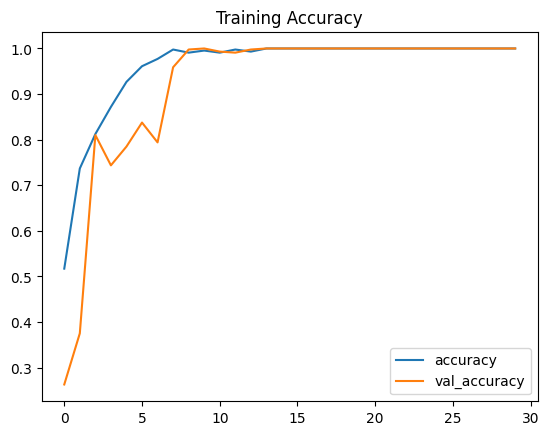

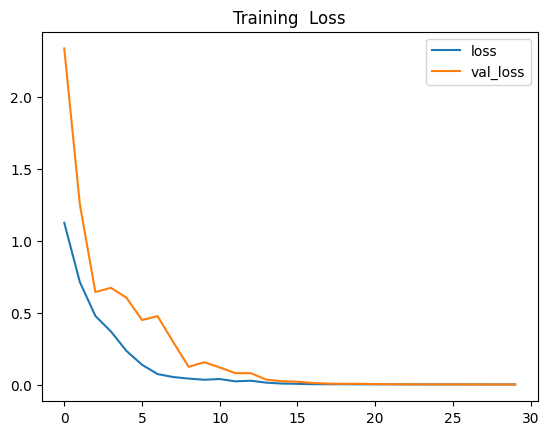



Accuracy on the test set: 95.45%
4/4 [==============================] - 10s 2s/step
Accuracy: 0.95455
Precision: 0.95443
Recall: 0.95455
F1 Score: 0.95414
                    precision    recall  f1-score   support

Bacterial spot rot       0.96      0.93      0.95        28
         Black Rot       1.00      1.00      1.00         9
      Downy Mildew       0.93      0.90      0.92        31
        No disease       0.95      1.00      0.98        42

          accuracy                           0.95       110
         macro avg       0.96      0.96      0.96       110
      weighted avg       0.95      0.95      0.95       110

Confusion Matrix of CNN: 




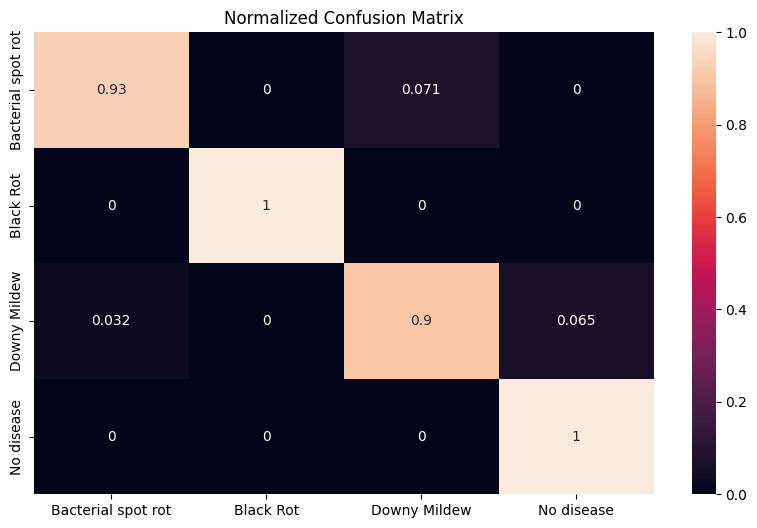

In [26]:
print('\n')


val_acc = history_01.history['val_accuracy']
train_acc = history_01.history['accuracy']

results = model_01.evaluate(test_images, verbose=0)
res=results[1]
test_acc = [round(res,4)]
#ploting training acc loss
print("Train Accuracy and Loss Plot: \n")
pd.DataFrame(history_01.history)[['accuracy','val_accuracy']].plot()
plt.title("Training Accuracy")
plt.show()
pd.DataFrame(history_01.history)[['loss','val_loss']].plot()
plt.title("Training  Loss")
plt.show()
print("\n\nAccuracy on the test set: {:.2f}%".format(results[1] * 100))

from sklearn.metrics import confusion_matrix
import seaborn as sns
pred = model_01.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
y_test = list(test_df.Label)

print('Accuracy:', np.round(metrics.accuracy_score(y_test, pred),5))
print('Precision:', np.round(metrics.precision_score(y_test, pred, average='weighted'),5))
print('Recall:', np.round(metrics.recall_score(y_test,pred, average='weighted'),5))
print('F1 Score:', np.round(metrics.f1_score(y_test, pred, average='weighted'),5))
print(classification_report(y_test, pred))

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from numpy import mean
print("Confusion Matrix of CNN: \n\n")
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (10,6))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.show()
confusion_matrix=cf_matrix
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = len(y_test) - (FP + FN + TP)

4/4 [==============================] - 7s 2s/step


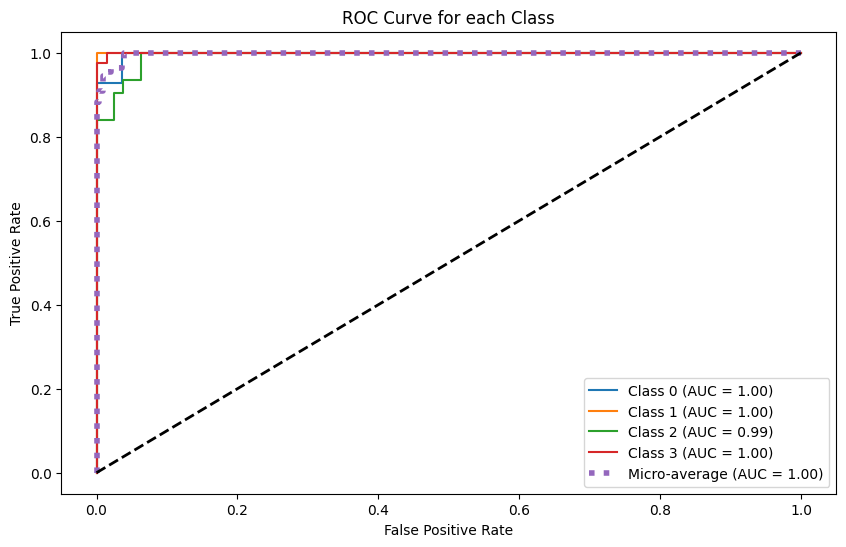

In [37]:
y_test_bin = label_binarize(y_test, classes=sorted(set(y_test)))

y_score = model_01.predict(test_images)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})',
         linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each Class')
plt.legend(loc='lower right')
plt.show()


In [38]:
pred = model_01.predict(test_images)
pred_classes = np.argmax(pred, axis=1)

true_classes = test_images.classes

conf_matrix = confusion_matrix(true_classes, pred_classes)

misclassification_error = 1 - np.trace(conf_matrix) / np.sum(conf_matrix)

print(f'Misclassification Error: {misclassification_error:.4f}')


4/4 [==============================] - 9s 2s/step
Misclassification Error: 0.0455


In [27]:
def get_model(model):

    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}

    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False

    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(256, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(256, activation='relu')(x)

    outputs = tf.keras.layers.Dense(n_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


Found 437 validated image filenames belonging to 4 classes.
Found 437 validated image filenames belonging to 4 classes.
Found 110 validated image filenames belonging to 4 classes.






DenseNet201 Model Training Started ===>>>
Epoch 1/10
14/14 [==============================] - 86s 5s/step - loss: 0.5091 - accuracy: 0.8124 - val_loss: 0.1157 - val_accuracy: 0.9703
Epoch 2/10
14/14 [==============================] - 65s 5s/step - loss: 0.0687 - accuracy: 0.9703 - val_loss: 0.0811 - val_accuracy: 0.9725
Epoch 3/10
14/14 [==============================] - 68s 5s/step - loss: 0.0395 - accuracy: 0.9863 - val_loss: 0.0136 - val_accuracy: 0.9977
Epoch 4/10
14/14 [==============================] - 65s 5s/step - loss: 0.0140 - accuracy: 0.9977 - val_loss: 0.0058 - val_accuracy: 0.9977
Epoch 5/10
14/14 [==============================] - 63s 5s/step - loss: 0.0120 - accuracy: 0.9954 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 68s 5s/step - loss: 

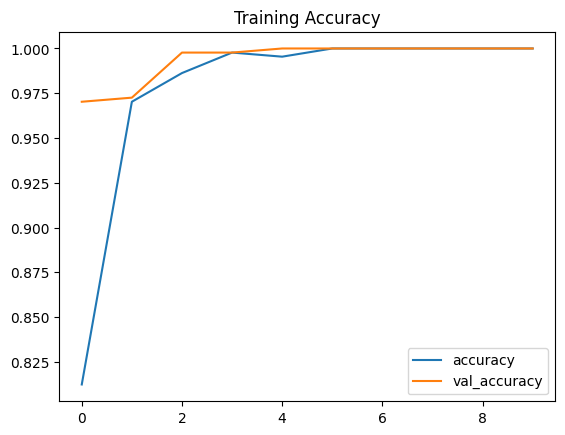

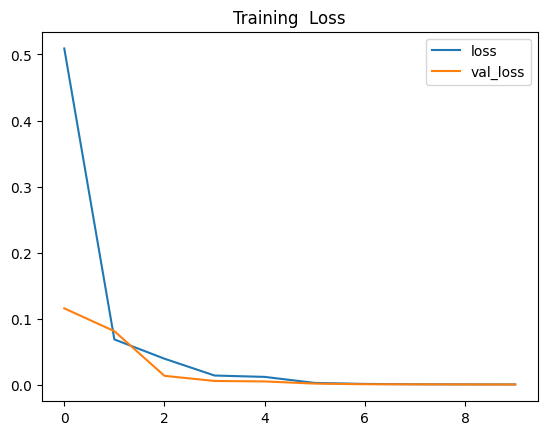



Accuracy on the test set: 96.36%
4/4 [==============================] - 13s 2s/step
Accuracy: 0.96364
Precision: 0.96685
Recall: 0.96364
F1 Score: 0.96404
                    precision    recall  f1-score   support

Bacterial spot rot       1.00      0.93      0.96        28
         Black Rot       0.82      1.00      0.90         9
      Downy Mildew       0.97      0.94      0.95        31
        No disease       0.98      1.00      0.99        42

          accuracy                           0.96       110
         macro avg       0.94      0.97      0.95       110
      weighted avg       0.97      0.96      0.96       110

DenseNet201 Confusion Matrix: 




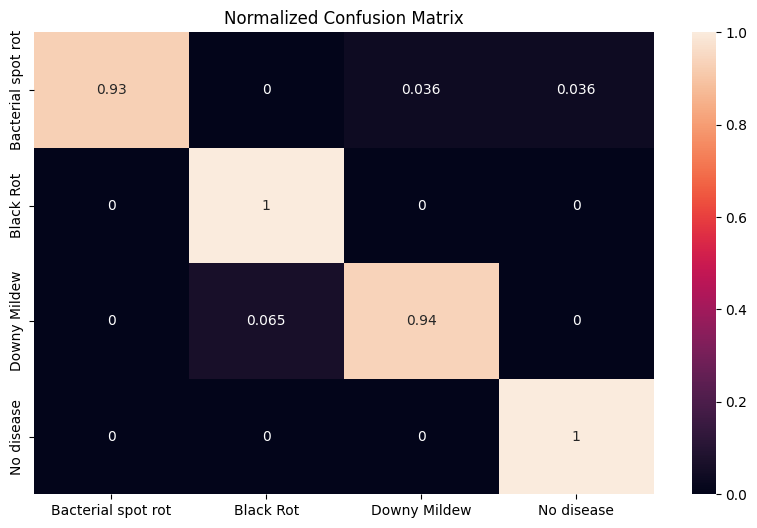



80134624/80134624 [==============================] - 0s 0us/step
VGG19 Model Training Started ===>>>
Epoch 1/10
14/14 [==============================] - 71s 5s/step - loss: 1.0748 - accuracy: 0.6362 - val_loss: 0.7089 - val_accuracy: 0.8398
Epoch 2/10
14/14 [==============================] - 66s 5s/step - loss: 0.5282 - accuracy: 0.8764 - val_loss: 0.3392 - val_accuracy: 0.8924
Epoch 3/10
14/14 [==============================] - 64s 5s/step - loss: 0.2969 - accuracy: 0.9130 - val_loss: 0.2227 - val_accuracy: 0.9245
Epoch 4/10
14/14 [==============================] - 65s 5s/step - loss: 0.1787 - accuracy: 0.9611 - val_loss: 0.1722 - val_accuracy: 0.9245
Epoch 5/10
14/14 [==============================] - 63s 5s/step - loss: 0.1250 - accuracy: 0.9657 - val_loss: 0.0893 - val_accuracy: 0.9840
Epoch 6/10
14/14 [==============================] - 66s 5s/step - loss: 0.0950 - accuracy: 0.9840 - val_loss: 0.0662 - val_accuracy: 0.9886
Epoch 7/10
14/14 [==============================] - 64s 5

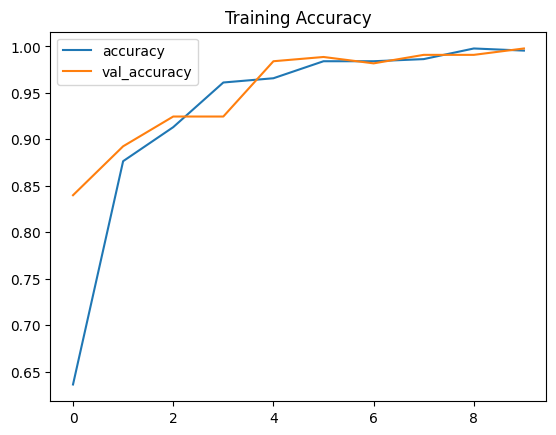

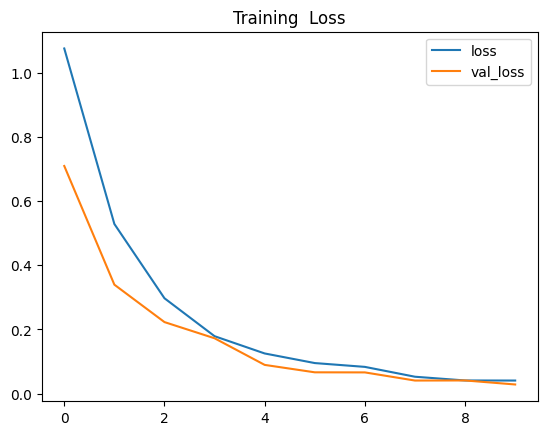



Accuracy on the test set: 99.09%
4/4 [==============================] - 9s 2s/step
Accuracy: 0.99091
Precision: 0.99119
Recall: 0.99091
F1 Score: 0.9909
                    precision    recall  f1-score   support

Bacterial spot rot       1.00      0.96      0.98        28
         Black Rot       1.00      1.00      1.00         9
      Downy Mildew       0.97      1.00      0.98        31
        No disease       1.00      1.00      1.00        42

          accuracy                           0.99       110
         macro avg       0.99      0.99      0.99       110
      weighted avg       0.99      0.99      0.99       110

VGG19 Confusion Matrix: 




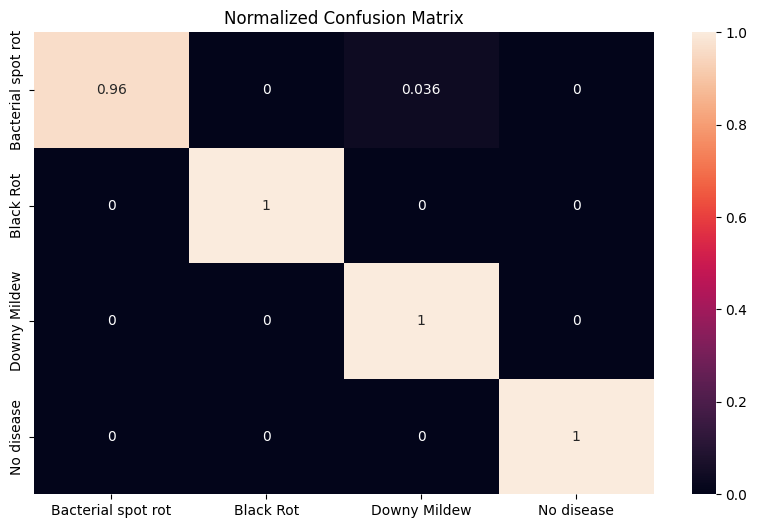



94668760/94668760 [==============================] - 0s 0us/step
ResNet50V2 Model Training Started ===>>>
Epoch 1/10
14/14 [==============================] - 72s 5s/step - loss: 0.4706 - accuracy: 0.8444 - val_loss: 0.1397 - val_accuracy: 0.9451
Epoch 2/10
14/14 [==============================] - 73s 5s/step - loss: 0.0624 - accuracy: 0.9817 - val_loss: 0.0193 - val_accuracy: 0.9977
Epoch 3/10
14/14 [==============================] - 62s 5s/step - loss: 0.0149 - accuracy: 0.9977 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 4/10
14/14 [==============================] - 74s 5s/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9954
Epoch 5/10
14/14 [==============================] - 64s 5s/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 73s 5s/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 

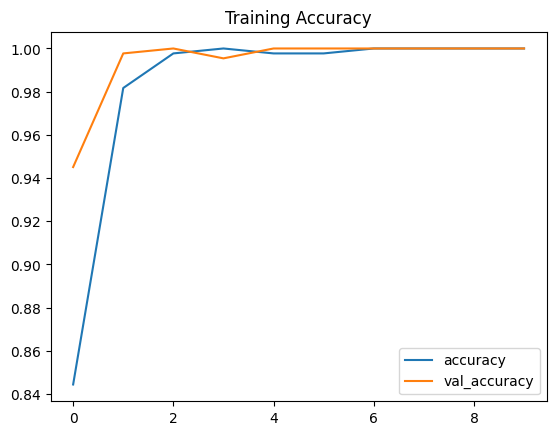

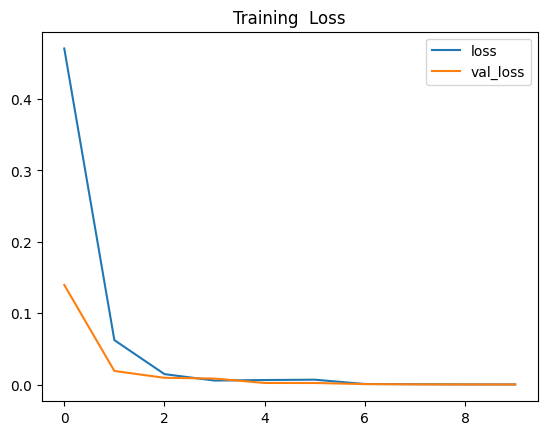



Accuracy on the test set: 97.27%
4/4 [==============================] - 8s 2s/step
Accuracy: 0.97273
Precision: 0.97267
Recall: 0.97273
F1 Score: 0.97255
                    precision    recall  f1-score   support

Bacterial spot rot       0.96      0.93      0.95        28
         Black Rot       1.00      1.00      1.00         9
      Downy Mildew       0.97      1.00      0.98        31
        No disease       0.98      0.98      0.98        42

          accuracy                           0.97       110
         macro avg       0.98      0.98      0.98       110
      weighted avg       0.97      0.97      0.97       110

ResNet50V2 Confusion Matrix: 




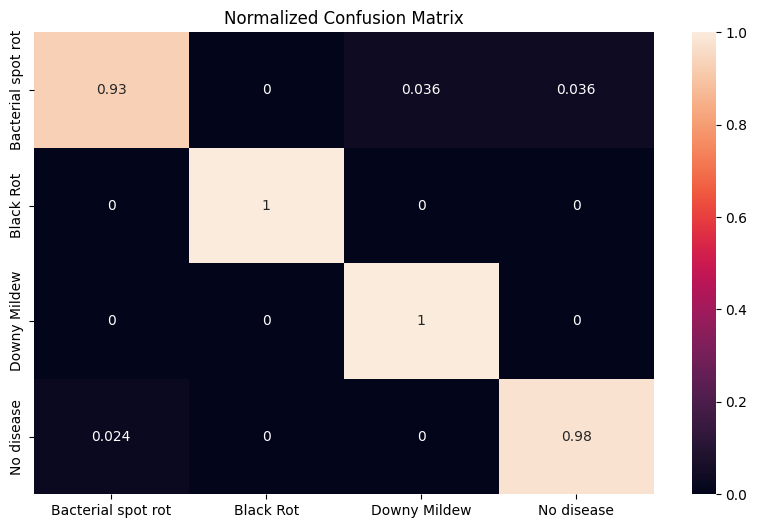



12683000/12683000 [==============================] - 0s 0us/step
MobileNetV3Large Model Training Started ===>>>
Epoch 1/10
14/14 [==============================] - 72s 5s/step - loss: 1.2995 - accuracy: 0.3753 - val_loss: 1.1552 - val_accuracy: 0.4989
Epoch 2/10
14/14 [==============================] - 62s 5s/step - loss: 1.1059 - accuracy: 0.5492 - val_loss: 1.0413 - val_accuracy: 0.5469
Epoch 3/10
14/14 [==============================] - 63s 5s/step - loss: 1.0062 - accuracy: 0.5789 - val_loss: 0.9238 - val_accuracy: 0.6247
Epoch 4/10
14/14 [==============================] - 64s 5s/step - loss: 0.9049 - accuracy: 0.6476 - val_loss: 0.8407 - val_accuracy: 0.6705
Epoch 5/10
14/14 [==============================] - 62s 5s/step - loss: 0.8407 - accuracy: 0.6705 - val_loss: 0.7904 - val_accuracy: 0.6751
Epoch 6/10
14/14 [==============================] - 64s 5s/step - loss: 0.7497 - accuracy: 0.6979 - val_loss: 0.6856 - val_accuracy: 0.7391
Epoch 7/10
14/14 [============================

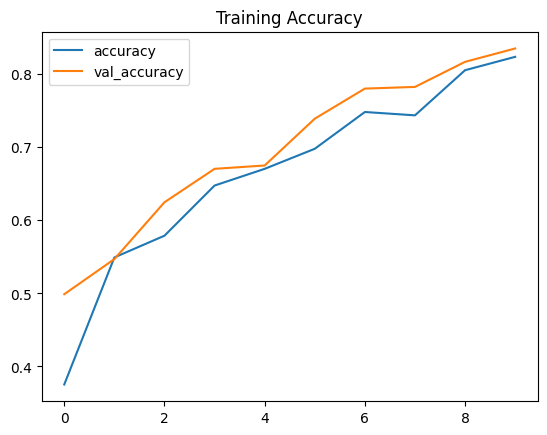

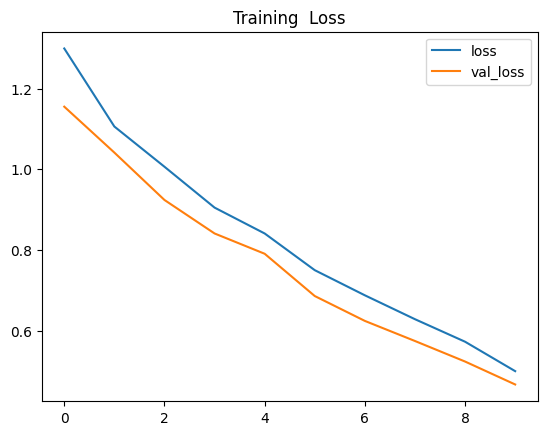



Accuracy on the test set: 81.82%
4/4 [==============================] - 9s 2s/step
Accuracy: 0.81818
Precision: 0.83333
Recall: 0.81818
F1 Score: 0.81577
                    precision    recall  f1-score   support

Bacterial spot rot       0.67      0.79      0.72        28
         Black Rot       1.00      0.44      0.62         9
      Downy Mildew       0.81      0.81      0.81        31
        No disease       0.93      0.93      0.93        42

          accuracy                           0.82       110
         macro avg       0.85      0.74      0.77       110
      weighted avg       0.83      0.82      0.82       110

MobileNetV3Large Confusion Matrix: 




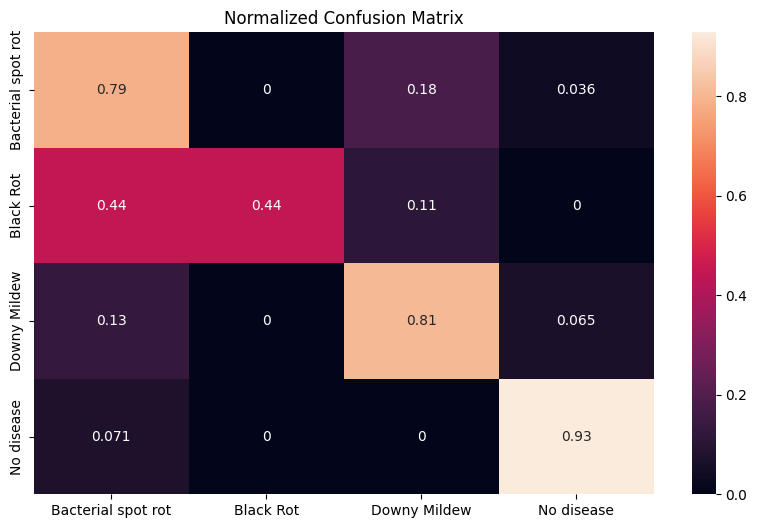

In [29]:
models = {
    "DenseNet201": {"model": tf.keras.applications.DenseNet201, "perf": 0},
    "VGG19": {"model": tf.keras.applications.VGG19, "perf": 0},
    "ResNet50V2": {"model": tf.keras.applications.ResNet50V2, "perf": 0},
    "MobileNetV3Large": {"model": tf.keras.applications.MobileNetV3Large, "perf": 0},
}


train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')
print('\n')


for name, model in models.items():
    print('\n')


    m = get_model(model['model'])
    models[name]['model'] = m


    print(f"{name:2} Model Training Started ===>>>")


    start = perf_counter()

    
    history = m.fit(train_images,validation_data=val_images,epochs=10,verbose=1)

    
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:2} trained in {duration} sec")

    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

    train_acc = history.history['accuracy']
    models[name]['train_accuracy'] = [round(v,4) for v in train_acc]

    results = m.evaluate(test_images, verbose=0)
    res=results[1]
    models[name]['test_accuracy'] = [round(res,4)]

    #ploting training acc loss
    print(f"{name:2} Train Accuracy and Loss Plot: \n")

    pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
    plt.title("Training Accuracy")
    plt.show()
    pd.DataFrame(history.history)[['loss','val_loss']].plot()
    plt.title("Training  Loss")
    plt.show()

    print("\n\nAccuracy on the test set: {:.2f}%".format(results[1] * 100))


    pred = m.predict(test_images)
    pred = np.argmax(pred,axis=1)

    
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    y_test = list(test_df.Label)

    print('Accuracy:', np.round(metrics.accuracy_score(y_test, pred),5))
    print('Precision:', np.round(metrics.precision_score(y_test, pred, average='weighted'),5))
    print('Recall:', np.round(metrics.recall_score(y_test,pred, average='weighted'),5))
    print('F1 Score:', np.round(metrics.f1_score(y_test, pred, average='weighted'),5))
    print(classification_report(y_test, pred))


    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import math
    from numpy import mean


    print(f"{name:2} Confusion Matrix: \n\n")
    cf_matrix = confusion_matrix(y_test, pred, normalize='true')
    plt.figure(figsize = (10,6))
    sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
    plt.title('Normalized Confusion Matrix')
    plt.show()

    confusion_matrix=cf_matrix

    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = len(y_test) - (FP + FN + TP)




==================== DenseNet201 ====================
4/4 [==============================] - 8s 2s/step


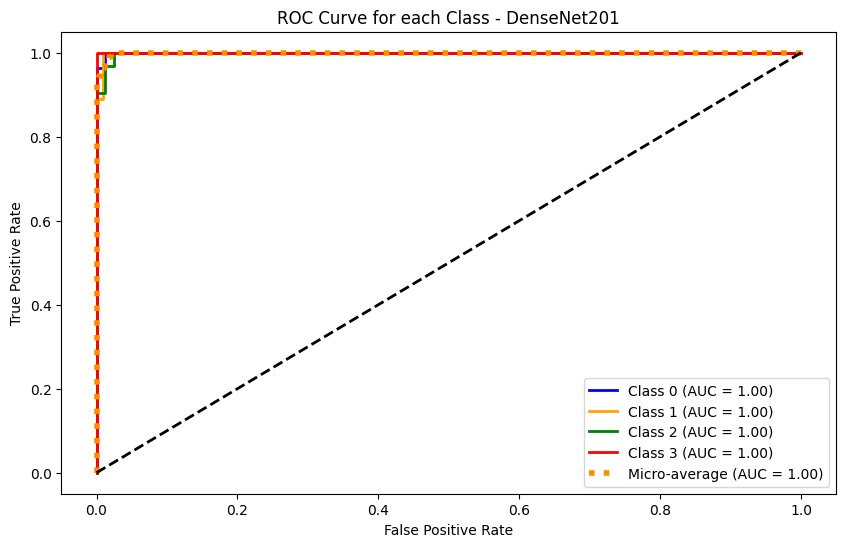


==================== VGG19 ====================
4/4 [==============================] - 8s 2s/step


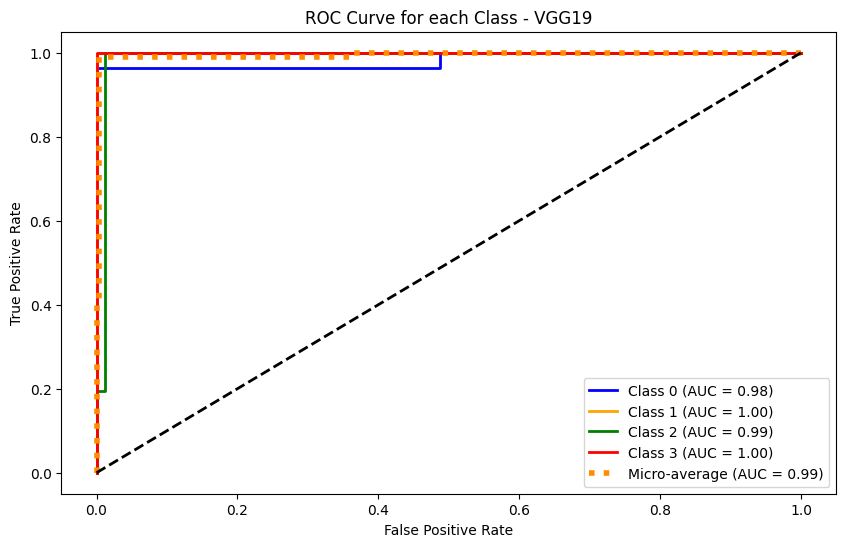


==================== ResNet50V2 ====================
4/4 [==============================] - 9s 2s/step


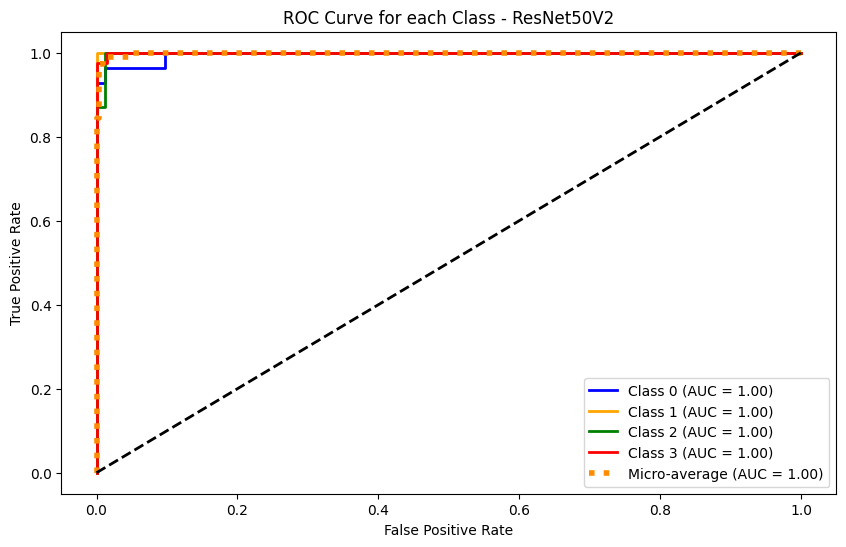


==================== MobileNetV3Large ====================
4/4 [==============================] - 9s 2s/step


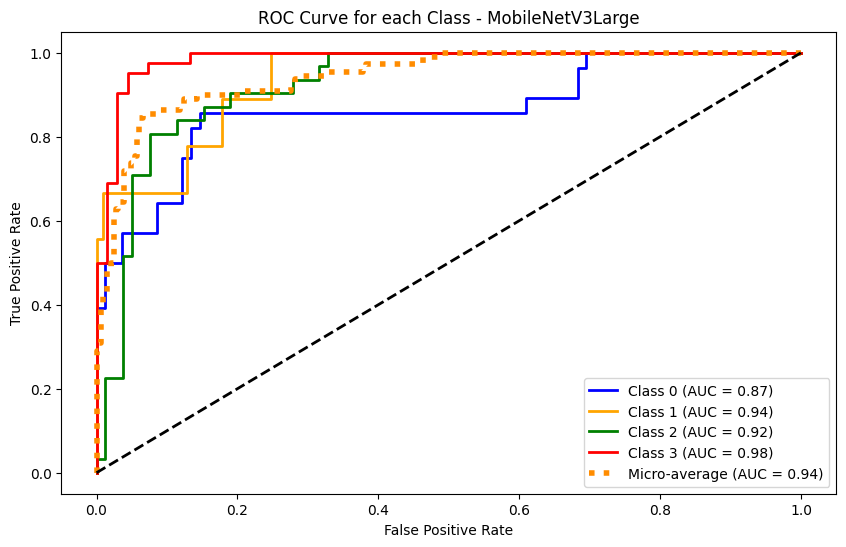

In [30]:
# Fit the models
for name, model_info in models.items():
    m = model_info['model']

    print(f"\n{ '=' * 20 } { name } {'=' * 20 }")

    
    test_images.reset()

    
    y_prob = m.predict(test_images)

    
    y_test_bin = label_binarize(y_test, classes=sorted(set(y_test)))

    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    
    for i in range(len(set(y_test))):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  

    for i, color in zip(range(len(set(y_test))), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    
    fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, color='darkorange', linestyle=':',
             label=f'Micro-average (AUC = {roc_auc_micro:.2f})', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for each Class - {name}')
    plt.legend(loc='lower right')
    plt.show()



==================== DenseNet201 ====================
4/4 [==============================] - 11s 3s/step
Misclassification Error: 0.0364

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.82      1.00      0.90         9
           2       0.97      0.94      0.95        31
           3       0.98      1.00      0.99        42

    accuracy                           0.96       110
   macro avg       0.94      0.97      0.95       110
weighted avg       0.97      0.96      0.96       110



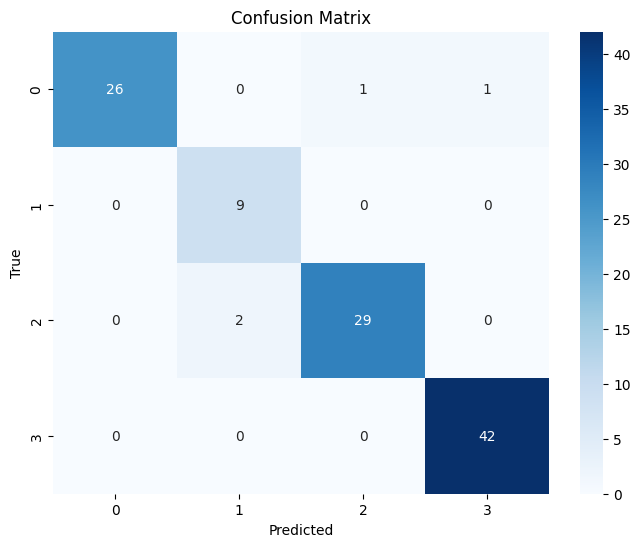


==================== VGG19 ====================
4/4 [==============================] - 8s 2s/step
Misclassification Error: 0.0091

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       1.00      1.00      1.00         9
           2       0.97      1.00      0.98        31
           3       1.00      1.00      1.00        42

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110



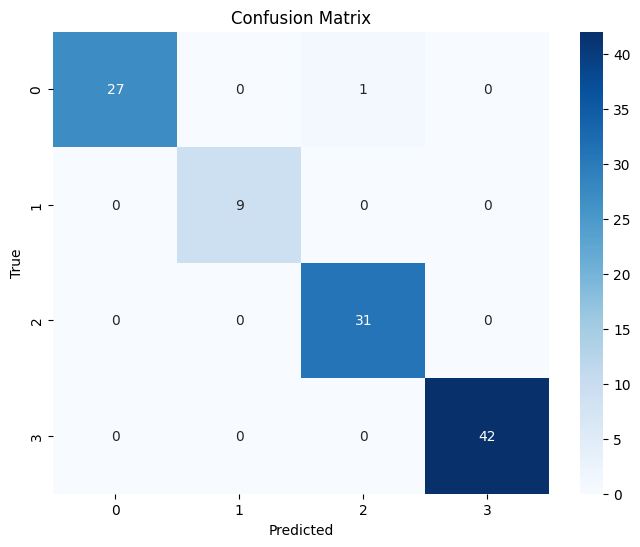


==================== ResNet50V2 ====================
4/4 [==============================] - 8s 2s/step
Misclassification Error: 0.0273

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       1.00      1.00      1.00         9
           2       0.97      1.00      0.98        31
           3       0.98      0.98      0.98        42

    accuracy                           0.97       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.97      0.97      0.97       110



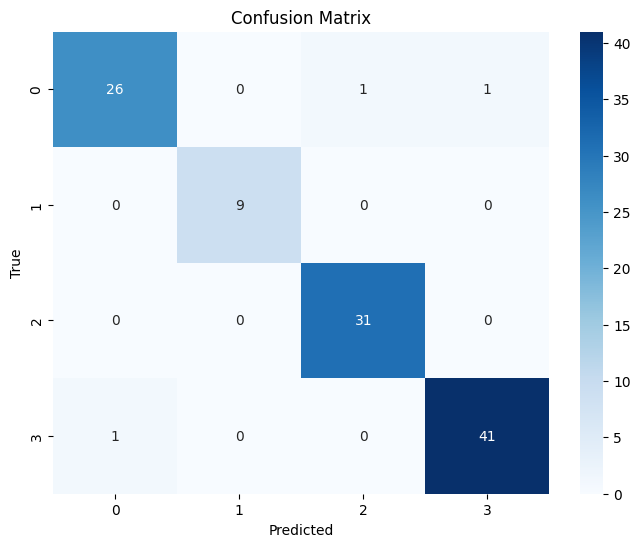


==================== MobileNetV3Large ====================
4/4 [==============================] - 8s 2s/step
Misclassification Error: 0.1818

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.79      0.72        28
           1       1.00      0.44      0.62         9
           2       0.81      0.81      0.81        31
           3       0.93      0.93      0.93        42

    accuracy                           0.82       110
   macro avg       0.85      0.74      0.77       110
weighted avg       0.83      0.82      0.82       110



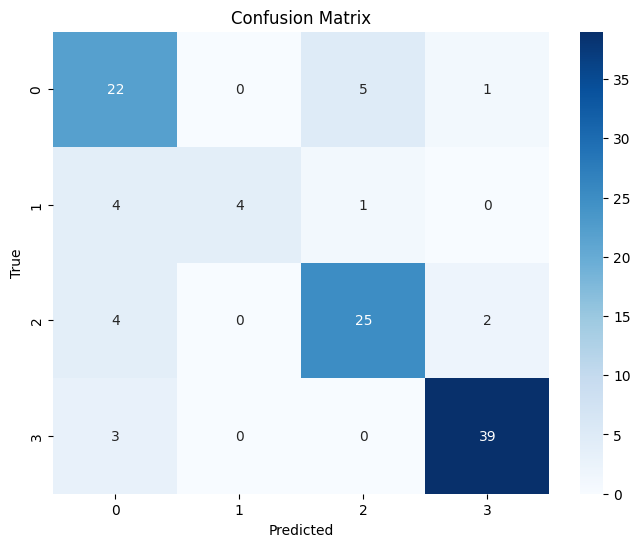

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fit the models
for name, model_info in models.items():
    # Get the model
    m = model_info['model']

    print(f"\n{ '=' * 20 } { name } {'=' * 20 }")

    # Reset the state of the test_images generator
    test_images.reset()

    # Get predictions on the test set
    y_pred = m.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Get true labels
    y_true = test_images.classes

    # Calculate misclassification error
    misclassification_error = 1 - accuracy_score(y_true, y_pred_classes)

    print(f'Misclassification Error: {misclassification_error:.4f}')

    # Display classification report and confusion matrix
    print('\nClassification Report:\n', classification_report(y_true, y_pred_classes))

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=sorted(set(y_true)), yticklabels=sorted(set(y_true)))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ...


In [40]:
for name, model_data in models.items():
    model = model_data['model']
    model.save(f'/content/drive/MyDrive/cauliflower_paper/SavedModel/{name}')

In [41]:
loaded_models = {}

for name in models.keys():
    loaded_model = tf.keras.models.load_model(f'/content/drive/MyDrive/cauliflower_paper/SavedModel/{name}')
    loaded_models[name] = loaded_model


In [42]:
# Define a function for image classification
def classify_image(model, image_path, class_names):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Rescale the image to match the training data preprocessing

    # Make predictions
    predictions = model.predict(img)

    # Get the class label with the highest probability
    predicted_class = np.argmax(predictions)

    # Get the class name
    class_name = class_names[predicted_class]

    return class_name, predictions[0]


In [43]:
from tensorflow.keras.preprocessing import image
# Load the saved models
model_DenseNet201 = tf.keras.models.load_model("/content/drive/MyDrive/cauliflower_paper/SavedModel/DenseNet201")
model_ResNet50V2 = tf.keras.models.load_model("/content/drive/MyDrive/cauliflower_paper/SavedModel/ResNet50V2")
model_VGG19 = tf.keras.models.load_model("/content/drive/MyDrive/cauliflower_paper/SavedModel/VGG19")
model_MobileNetV3Large = tf.keras.models.load_model("/content/drive/MyDrive/cauliflower_paper/SavedModel/MobileNetV3Large")

image_path = '/content/drive/MyDrive/cauliflower_paper/cauliflower/Black Rot/Black Rot(16).jpg'

# Define your class names
class_names = ["Bacterial spot rot", "Black Rot", "Downy Mildew", "No disease"]

# Perform classification for DenseNet201
class_name_DenseNet201, probabilities_DenseNet201 = classify_image(model_DenseNet201, image_path, class_names)

# Perform classification for ResNet50V2
class_name_ResNet50V2, probabilities_ResNet50V2 = classify_image(model_ResNet50V2, image_path, class_names)

# Perform classification for VGG19
class_name_VGG19, probabilities_VGG19 = classify_image(model_VGG19, image_path, class_names)

# Perform classification for MobileNetV3Large
class_name_MobileNetV3Large, probabilities_MobileNetV3Large = classify_image(model_MobileNetV3Large, image_path, class_names)


1/1 [==============================] - 2s 2s/step


DenseNet201 Prediction:
Predicted Class: Black Rot
Class Probabilities:
Bacterial spot rot: 0.0004
Black Rot: 0.9994
Downy Mildew: 0.0002
No disease: 0.0000


ResNet50V2 Prediction:
Predicted Class: Black Rot
Class Probabilities:
Bacterial spot rot: 0.0001
Black Rot: 0.9959
Downy Mildew: 0.0037
No disease: 0.0002


VGG19 Prediction:
Predicted Class: Black Rot
Class Probabilities:
Bacterial spot rot: 0.0033
Black Rot: 0.8561
Downy Mildew: 0.1286
No disease: 0.0120


MobileNetV3Large Prediction:
Predicted Class: Downy Mildew
Class Probabilities:
Bacterial spot rot: 0.1893
Black Rot: 0.0544
Downy Mildew: 0.7244
No disease: 0.0319




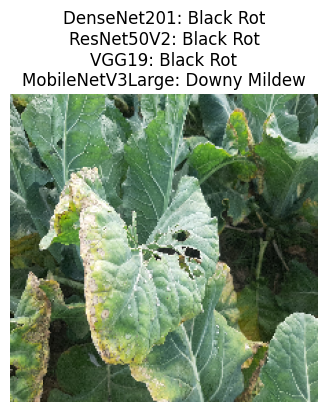

In [44]:
# Print the results for DenseNet201
print("DenseNet201 Prediction:")
print(f"Predicted Class: {class_name_DenseNet201}")
print("Class Probabilities:")
for i, prob in enumerate(probabilities_DenseNet201):
    print(f"{class_names[i]}: {prob:.4f}")
print("\n")

# Print the results for ResNet50V2
print("ResNet50V2 Prediction:")
print(f"Predicted Class: {class_name_ResNet50V2}")
print("Class Probabilities:")
for i, prob in enumerate(probabilities_ResNet50V2):
    print(f"{class_names[i]}: {prob:.4f}")
print("\n")

# Print the results for VGG19
print("VGG19 Prediction:")
print(f"Predicted Class: {class_name_VGG19}")
print("Class Probabilities:")
for i, prob in enumerate(probabilities_VGG19):
    print(f"{class_names[i]}: {prob:.4f}")
print("\n")

# Print the results for MobileNetV3Large
print("MobileNetV3Large Prediction:")
print(f"Predicted Class: {class_name_MobileNetV3Large}")
print("Class Probabilities:")
for i, prob in enumerate(probabilities_MobileNetV3Large):
    print(f"{class_names[i]}: {prob:.4f}")
print("\n")

# Plot the image with predicted class names
plt.figure(figsize=(4, 4))
plt.imshow(image.load_img(image_path, target_size=(224, 224)))
plt.axis('off')
plt.title(f"DenseNet201: {class_name_DenseNet201}\nResNet50V2: {class_name_ResNet50V2}\nVGG19: {class_name_VGG19}\nMobileNetV3Large: {class_name_MobileNetV3Large}")
plt.show()

In [45]:
# Load the saved models
model_DenseNet201 = tf.keras.models.load_model("/content/drive/MyDrive/cauliflower_paper/SavedModel/DenseNet201")
model_ResNet50V2 = tf.keras.models.load_model("/content/drive/MyDrive/cauliflower_paper/SavedModel/ResNet50V2")
model_VGG19 = tf.keras.models.load_model("/content/drive/MyDrive/cauliflower_paper/SavedModel/VGG19")
model_MobileNetV3Large = tf.keras.models.load_model("/content/drive/MyDrive/cauliflower_paper/SavedModel/MobileNetV3Large")

image_path = '/content/drive/MyDrive/cauliflower_paper/cauliflower/Downy Mildew/Downy Mildew. (10).jpg'

# Perform classification for DenseNet201
class_name_DenseNet201, probabilities_DenseNet201 = classify_image(model_DenseNet201, image_path, class_names)

# Perform classification for ResNet50V2
class_name_ResNet50V2, probabilities_ResNet50V2 = classify_image(model_ResNet50V2, image_path, class_names)

# Perform classification for VGG19
class_name_VGG19, probabilities_VGG19 = classify_image(model_VGG19, image_path, class_names)

# Perform classification for MobileNetV3Large
class_name_MobileNetV3Large, probabilities_MobileNetV3Large = classify_image(model_MobileNetV3Large, image_path, class_names)


1/1 [==============================] - 1s 1s/step


DenseNet201 Prediction:
Predicted Class: Downy Mildew
Class Probabilities:
Bacterial spot rot: 0.0004
Black Rot: 0.0002
Downy Mildew: 0.9994
No disease: 0.0000


ResNet50V2 Prediction:
Predicted Class: Downy Mildew
Class Probabilities:
Bacterial spot rot: 0.0000
Black Rot: 0.0000
Downy Mildew: 1.0000
No disease: 0.0000


VGG19 Prediction:
Predicted Class: Downy Mildew
Class Probabilities:
Bacterial spot rot: 0.0002
Black Rot: 0.0184
Downy Mildew: 0.9789
No disease: 0.0025


MobileNetV3Large Prediction:
Predicted Class: Downy Mildew
Class Probabilities:
Bacterial spot rot: 0.1392
Black Rot: 0.0358
Downy Mildew: 0.8045
No disease: 0.0205




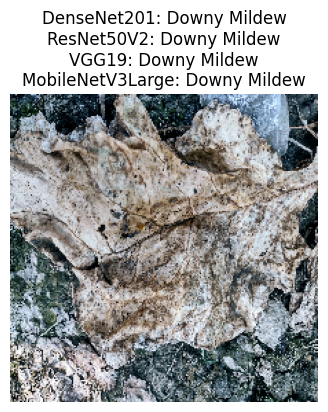

In [46]:
# Print the results for DenseNet201
print("DenseNet201 Prediction:")
print(f"Predicted Class: {class_name_DenseNet201}")
print("Class Probabilities:")
for i, prob in enumerate(probabilities_DenseNet201):
    print(f"{class_names[i]}: {prob:.4f}")
print("\n")

# Print the results for ResNet50V2
print("ResNet50V2 Prediction:")
print(f"Predicted Class: {class_name_ResNet50V2}")
print("Class Probabilities:")
for i, prob in enumerate(probabilities_ResNet50V2):
    print(f"{class_names[i]}: {prob:.4f}")
print("\n")

# Print the results for VGG19
print("VGG19 Prediction:")
print(f"Predicted Class: {class_name_VGG19}")
print("Class Probabilities:")
for i, prob in enumerate(probabilities_VGG19):
    print(f"{class_names[i]}: {prob:.4f}")
print("\n")

# Print the results for MobileNetV3Large
print("MobileNetV3Large Prediction:")
print(f"Predicted Class: {class_name_MobileNetV3Large}")
print("Class Probabilities:")
for i, prob in enumerate(probabilities_MobileNetV3Large):
    print(f"{class_names[i]}: {prob:.4f}")
print("\n")

# Plot the image with predicted class names
plt.figure(figsize=(4, 4))
plt.imshow(image.load_img(image_path, target_size=(224, 224)))
plt.axis('off')
plt.title(f"DenseNet201: {class_name_DenseNet201}\nResNet50V2: {class_name_ResNet50V2}\nVGG19: {class_name_VGG19}\nMobileNetV3Large: {class_name_MobileNetV3Large}")
plt.show()

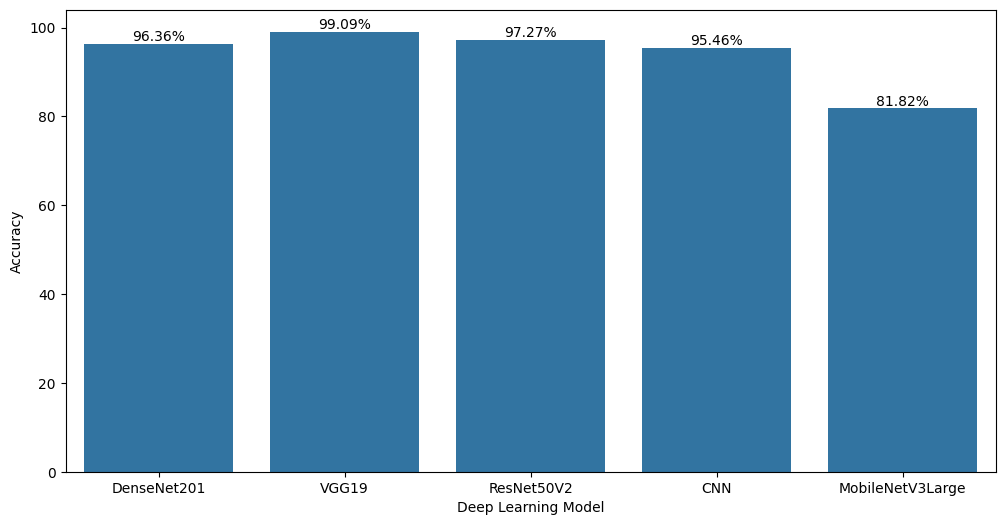

In [47]:
df = pd.DataFrame(data=
{'Deep Learning Model':['DenseNet201', 'VGG19' , 'ResNet50V2','CNN', 'MobileNetV3Large'],
'Accuracy':[96.36, 99.09 , 97.27, 95.46, 81.82]})

plt.figure(figsize=(12,6))

p = sns.barplot(x='Deep Learning Model', y='Accuracy',data=df)
for i in p.containers:
    labels = [f'{v.get_height():0.02f}%' for v in i]
    p.bar_label(i, labels=labels)